<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_model_selection/howManyClusters_SantiagoRuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import seaborn as sns; 
import numpy as np
from sklearn import mixture
sns.set(style="ticks", color_codes=True)
mpg = sns.load_dataset("mpg")
mpg_num=mpg.select_dtypes(include='number')
mpg_nnan=mpg_num.dropna()
mpg_nnan.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [30]:
mpg_nnan.shape

(392, 7)

In [57]:
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(mpg_nnan)
    bic.append(gmm.bic(mpg_nnan))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(mpg_nnan)



[21506.41942533935]
[21506.41942533935, 18383.75046818167]
[21506.41942533935, 18383.75046818167, 16778.501712822224]
[21506.41942533935, 18383.75046818167, 16778.501712822224, 14761.129380793158]
[21506.41942533935, 18383.75046818167, 16778.501712822224, 14761.129380793158, 15712.840206037434]
[21506.41942533935, 18383.75046818167, 16778.501712822224, 14761.129380793158, 15712.840206037434, 15855.267053590504]
[21506.41942533935, 18383.75046818167, 16778.501712822224, 14761.129380793158, 15712.840206037434, 15855.267053590504, 15716.141135232736]
[21506.41942533935, 18383.75046818167, 16778.501712822224, 14761.129380793158, 15712.840206037434, 15855.267053590504, 15716.141135232736, 15419.026524634293]
[21506.41942533935, 18383.75046818167, 16778.501712822224, 14761.129380793158, 15712.840206037434, 15855.267053590504, 15716.141135232736, 15419.026524634293, 16265.122677491003]
[21506.41942533935, 18383.75046818167, 16778.501712822224, 14761.129380793158, 15712.840206037434, 15855.267

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


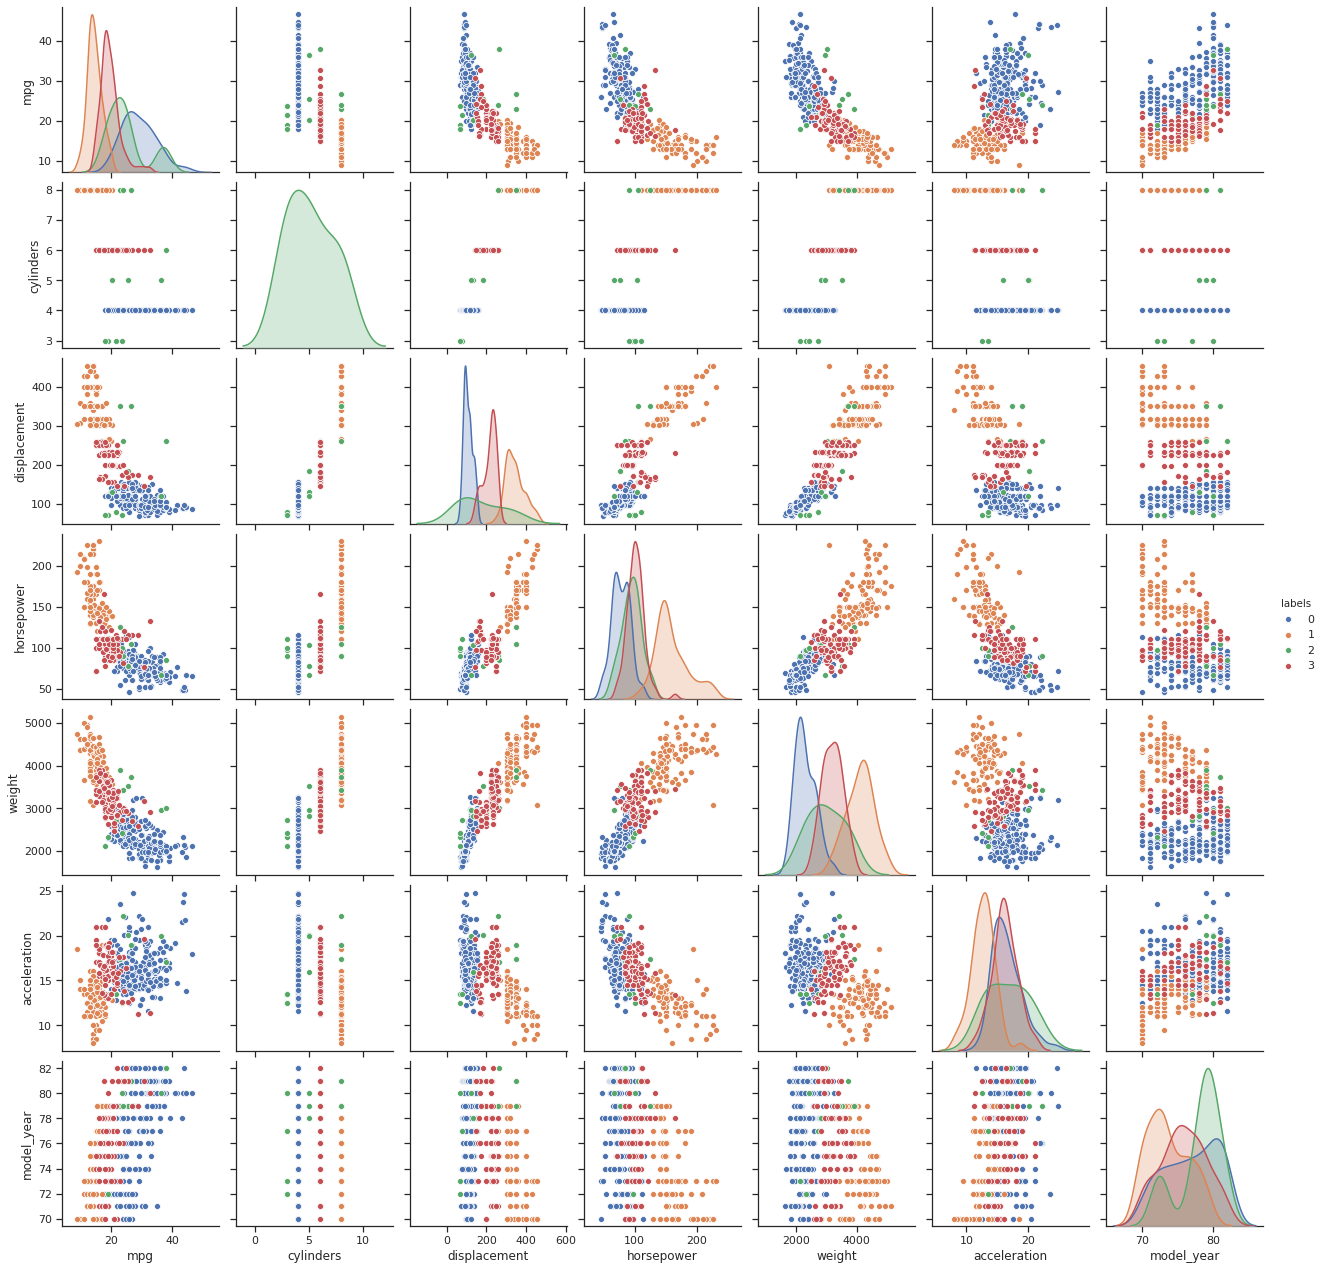

In [58]:

mpg_nnan["labels"]=gmm.predict(mpg_nnan)
g = sns.pairplot(mpg_nnan, hue="labels")

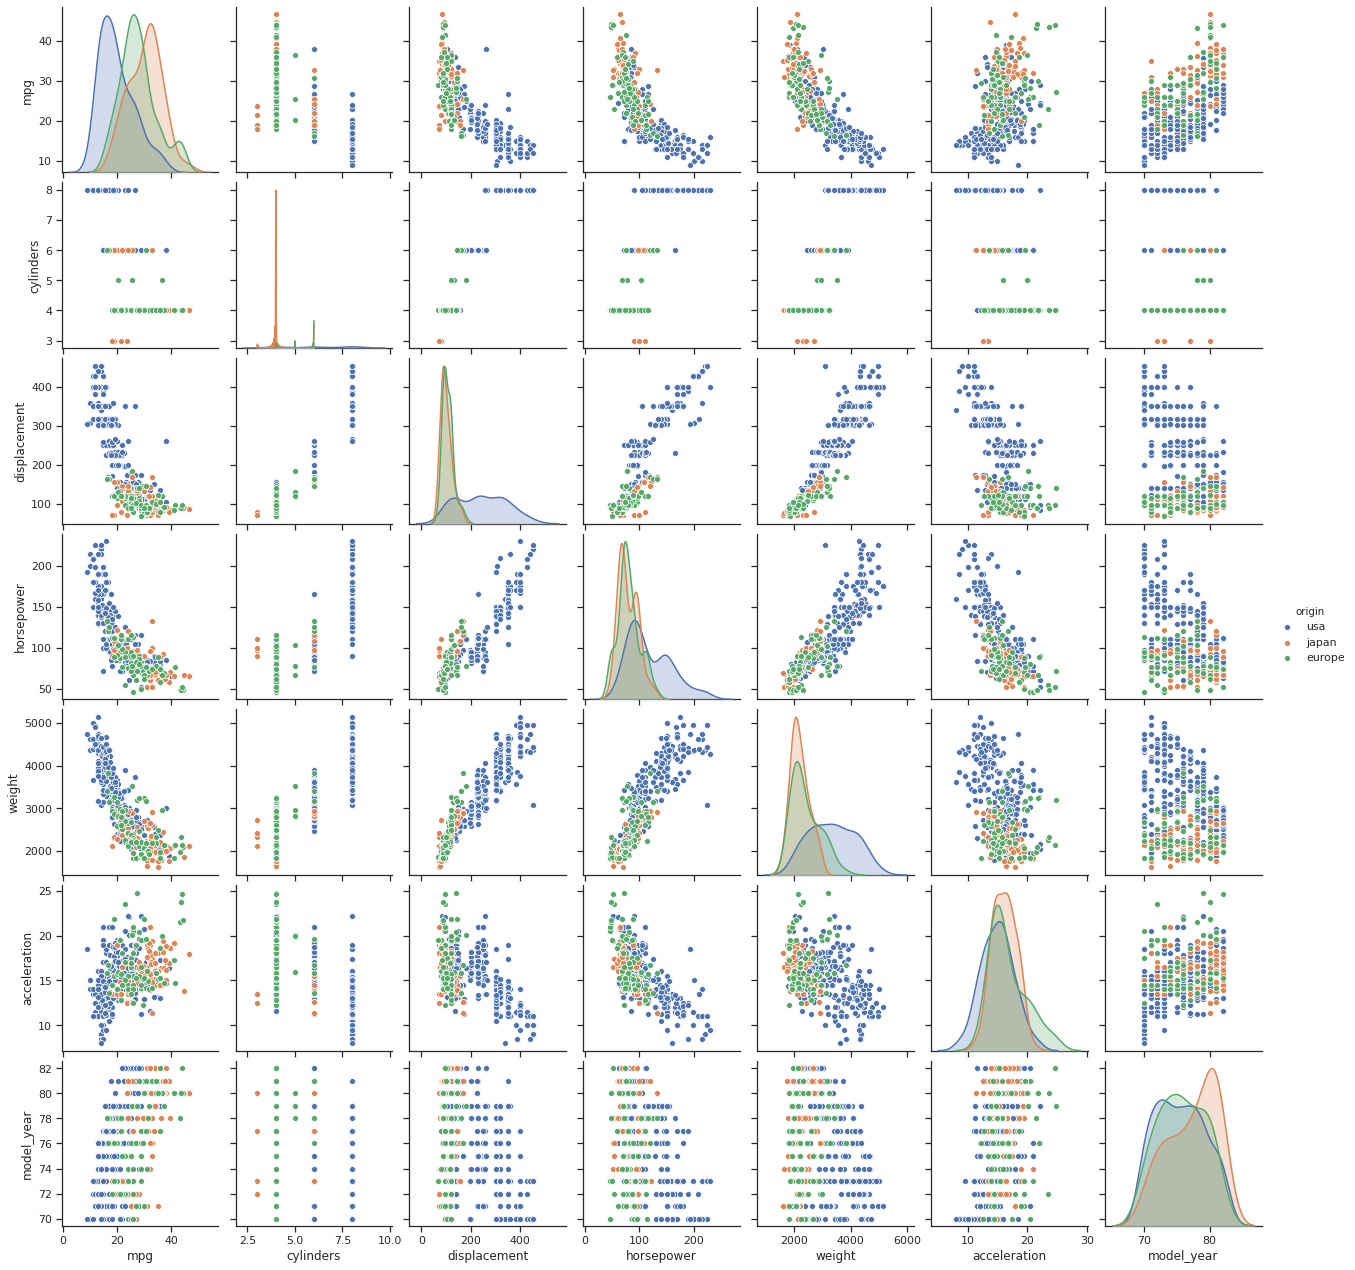

In [59]:
p=sns.pairplot(mpg,hue="origin")